# An introduction to Rasterio

The smallest interesting problems [1] addressed by Rasterio are reading raster data from files as [Numpy](http://www.numpy.org/) arrays and writing such arrays back to files. In between, you can use the world of scientific python software to analyze and process the data. Rasterio also provides a few operations that are described in the next notebooks in this series.

This notebook demonstrates the basics of reading and writing raster data with Rasterio.

## Overview of a dataset

A raster dataset consists of one or more dense (as opposed to sparse) 2-D arrays of scalar values. An RGB TIFF image file is a good example of a raster dataset. It has 3 bands (or channels – we'll call them bands here) and each has a number of rows (its `height`) and columns (its `width`) and a uniform data type (unsigned 8-bit integers, 64-bit floats, etc). Geospatially referenced datasets will also possess a mapping from image to world coordinates (a `transform`) in a specific coordinate reference system (`crs`). This metadata about a dataset is readily accessible using Rasterio.

The Scientific Python community often imports numpy as `np`. Do this and also import rasterio.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio import plot

Rasterio uses for many of its tests a small 3-band GeoTIFF file named "RGB.byte.tif". Open it using the function `rasterio.open()`.

In [18]:
src = rasterio.open('data/RGB.byte.tif')

This function returns a dataset object. It has many of the same properties as a Python file object.

In [19]:
src.name

'data/RGB.byte.tif'

In [20]:
src.mode

'r'

In [21]:
src.closed

False

Raster datasets have additional structure and a description can be had from its `meta` property or individually.

In [22]:
src.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 791,
 'height': 718,
 'count': 3,
 'crs': CRS({'init': 'epsg:32618'}),
 'transform': Affine(300.0379266750948, 0.0, 101985.0,
        0.0, -300.041782729805, 2826915.0)}

In [23]:
src.crs

CRS({'init': 'epsg:32618'})

To close an opened dataset, use its `close()` method.

In [24]:
src.close()
src.closed

True

You can't read from or write to a closed dataset, but you can continue access its properties.

In [25]:
src.driver

'GTiff'

## Dataset layout

Three properties of a Rasterio dataset tell you a lot about it in Numpy terms. The `shape` of a dataset is a `height, width` tuple and is exactly the shape of Numpy arrays that would be read from it. The testing dataset has 718 rows and 791 columns.

In [11]:
src.shape

(718, 791)

The `count` of bands in the dataset is 3.

In [12]:
src.count

3

All three of its bands contain 8-bit unsigned integers.

In [13]:
src.dtypes

('uint8', 'uint8', 'uint8')

Numpy concepts are the model here. If you wanted to create a 3-D Numpy array into which the testing data file's bands would fit without any resampling, you would use the following Python code.

In [14]:
dest = np.empty((src.count,) + src.shape, dtype='uint8')
dest

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

# Basic data visualization

Open the dataset again

In [26]:
src = rasterio.open(r"data/RGB.byte.tif")

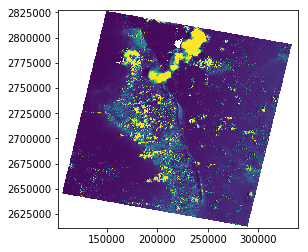

In [27]:
%matplotlib inline
plot.show(src)

### We can also display a single band of a multiband image by passing a tuple (raster source, band)

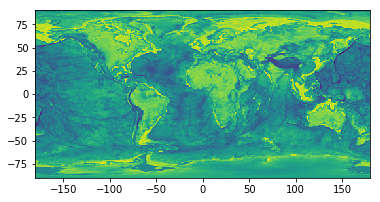

In [28]:
world = rasterio.open(r"data/world.rgb.tif")
plot.show((world, 2), cmap='viridis')

### side by side:

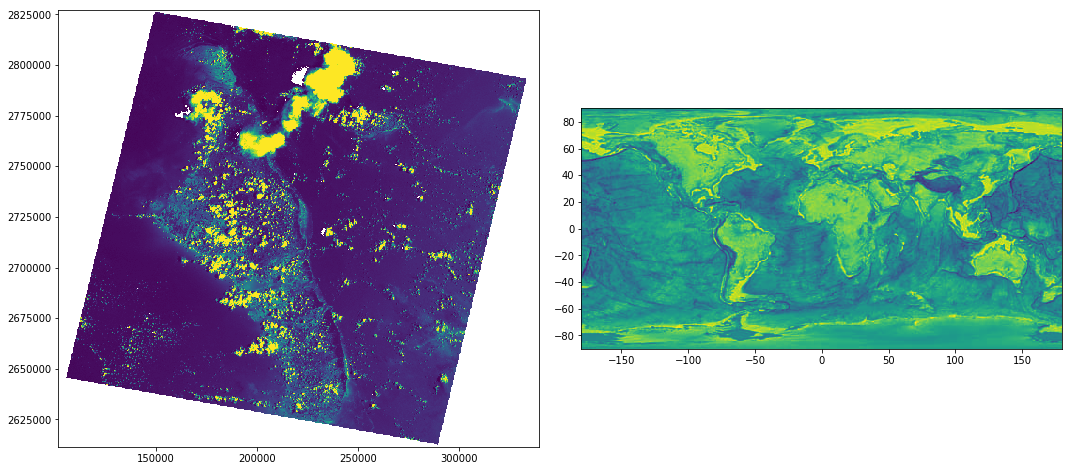

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
plot.show(src, ax=ax1)
plot.show((world, 2), cmap='viridis', ax=ax2)
fig.tight_layout()

## Multiple bands side by side

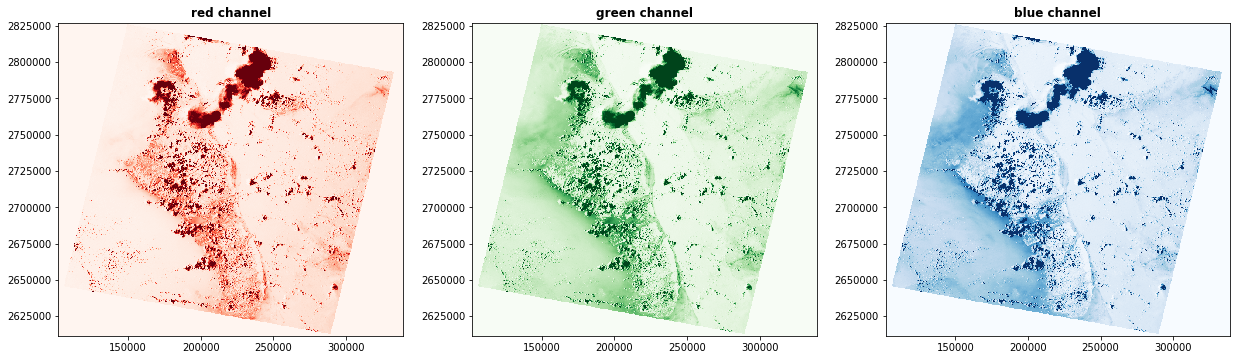

In [30]:
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
plot.show((src, 1), ax=axr, cmap='Reds', title='red channel')
plot.show((src, 2), ax=axg, cmap='Greens', title='green channel')
plot.show((src, 3), ax=axb, cmap='Blues', title='blue channel')

### How about the same thing but with the ability to navigate simultaneously?

<IPython.core.display.Javascript object>


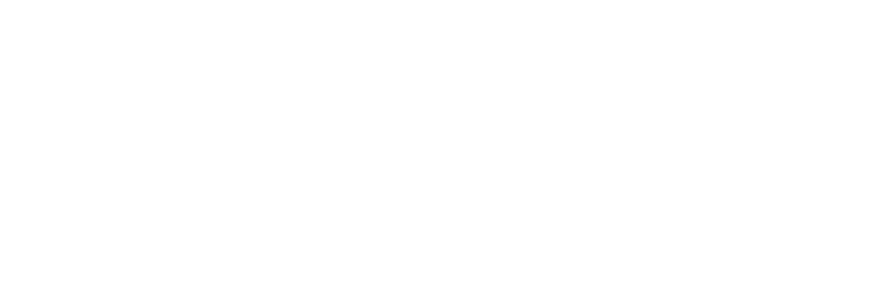

<IPython.core.display.Javascript object>


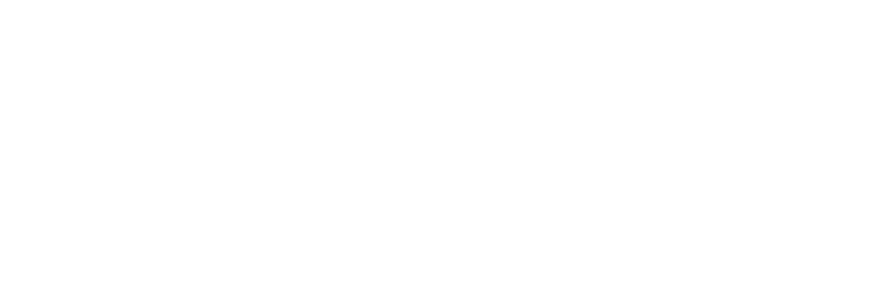

In [36]:
%matplotlib notebook
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(12, 4), sharex=True, sharey=True)
plot.show((src, 1), ax=axr, cmap='Reds', title='red channel')
plot.show((src, 2), ax=axg, cmap='Greens', title='green channel')
plot.show((src, 3), ax=axb, cmap='Blues', title='blue channel')

### If we want to see a histogram of the data we use the plot.show_hist function

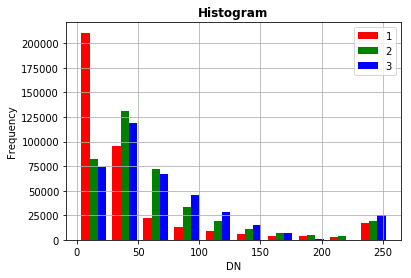

In [38]:
%matplotlib inline
plot.show_hist(src)


### Any of the optional pyplot histogram parameters can be passed to tweak the representation

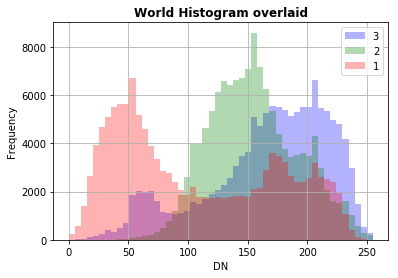

In [39]:
plot.show_hist(world, bins=50, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title="World Histogram overlaid")

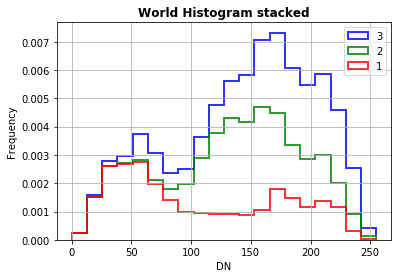

In [40]:
plot.show_hist(world, bins=20, lw=2.0, stacked=True,
               alpha=0.8, histtype='step', density=True, 
               title="World Histogram stacked")

### See matplotlib.pyplot.hist documentation at http://matplotlib.org/api/pyplot_api.html for a list of these parameters and available options

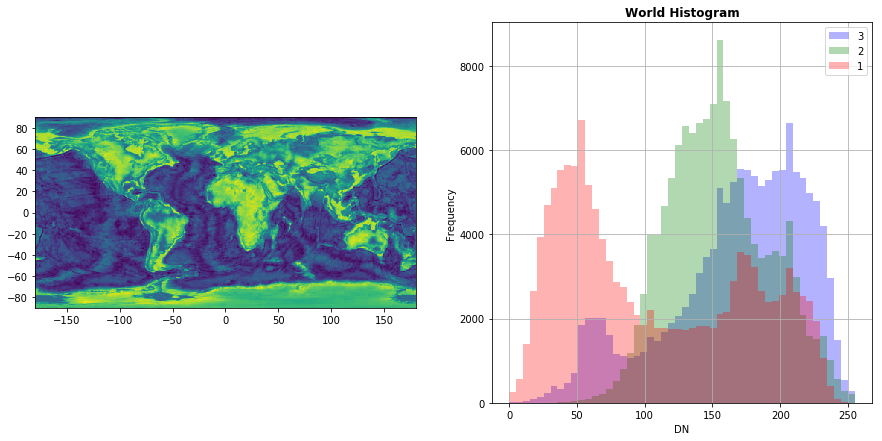

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
plot.show(world, ax=ax1)
plot.show_hist(world, bins=50, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title="World Histogram")
fig.tight_layout()

### Show contours from a raster

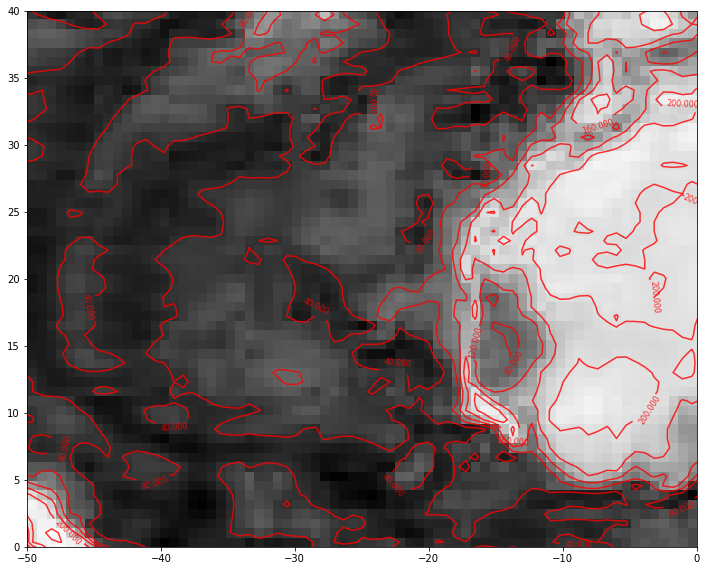

In [42]:
fig, ax = plt.subplots(1, figsize=(12, 12))
plot.show((world, 1), cmap='Greys_r', interpolation='none', ax=ax)
ax.set_xlim(-50, 0)
ax.set_ylim(0, 40)

plot.show((world, 1), contour=True, ax=ax)

### And of course there are many ways to easily customize this output ...

<IPython.core.display.Javascript object>


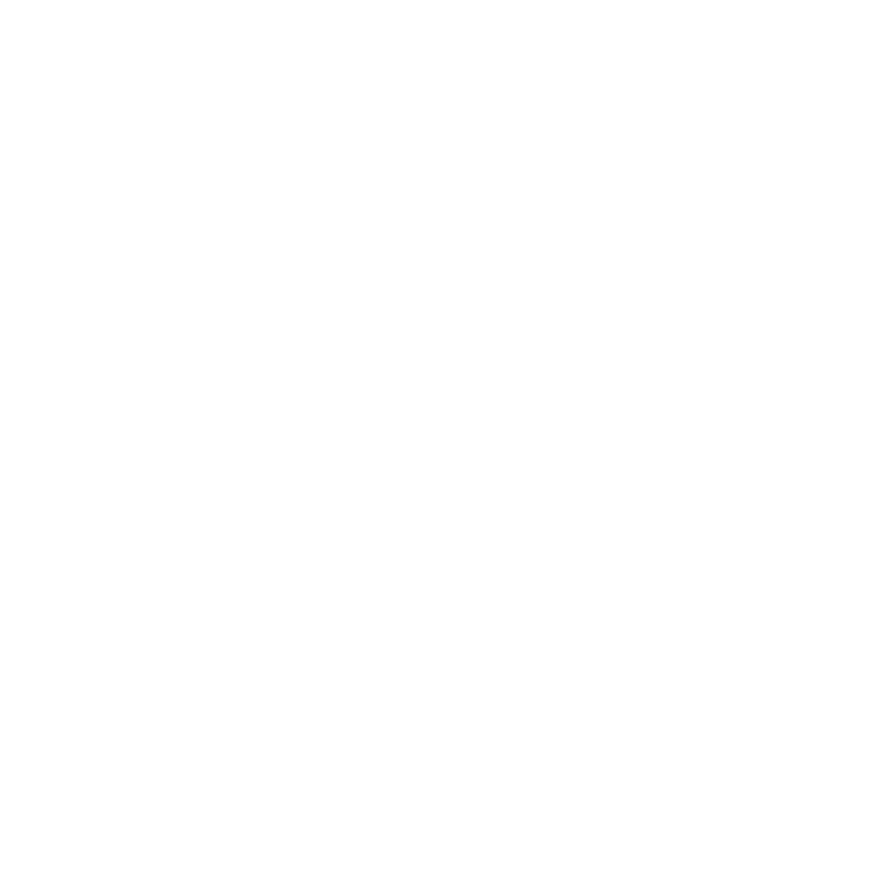

<IPython.core.display.Javascript object>


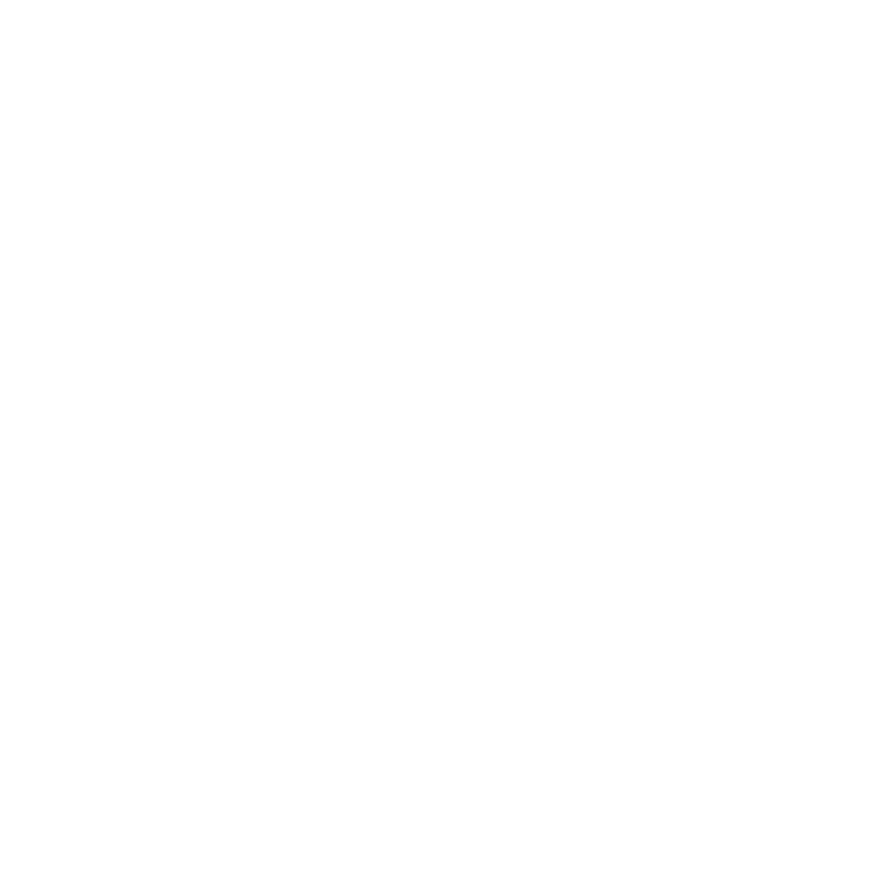

In [43]:
%matplotlib notebook
fig, ax = plt.subplots(1, figsize=(12, 12))
plot.show((world, 1), cmap='Greys_r', interpolation='none', ax=ax)
ax.set_xlim(-50, 0)
ax.set_ylim(0, 40)

plot.show((world, 1), contour=True, ax=ax, 
          levels=[25, 125], colors=['white', 'red'], linewidths=4,
         contour_label_kws=dict(fontsize=18, fmt="%1.0f", inline_spacing=15, use_clabeltext=True))

# Add a rasterio raster to a cartopy geoaxes

In [44]:
import cartopy
import cartopy.crs as ccrs

fig = plt.figure(figsize=(20, 12))
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())

ax.set_global()
plot.show(world, origin='upper', transform=ccrs.PlateCarree(), interpolation=None, ax=ax)

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)

ModuleNotFoundError: No module named 'cartopy'

## References

[1]: Mike Bostock's words from his FOSS4G keynote, 2014-09-10